# Mounting My Driver

In [ ]:
# Mounting the drive to acess the data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Liberaries

In [ ]:
# It commonly used "pip install + library" command to install most of the librarieS
pip install spectral

     |████████████████████████████████| 215kB 5.1MB/s 


In [ ]:
 from spectral import *
 import scipy.io as spio

# Indian Pins

In [ ]:
# IN This command , i acess the data files
Indian_Pins=spio.loadmat('/content/drive/MyDrive/Downloads/Indian_pines.mat')
Indian_Pins_gt=spio.loadmat('/content/drive/MyDrive/Downloads/Indian_pines_gt (1).mat')

In [ ]:
# THE DATA is in Dictionay format
# here i acessed the data part, neglecting the labels
Indian  =Indian_Pins['indian_pines']
Indian_gt=Indian_Pins_gt['indian_pines_gt']

In [ ]:
# DATA information
Indian.shape

(145, 145, 220)

In [ ]:
#Indian.shape
pixel=Indian[50 , 100]

In [ ]:
pixel.shape

(220,)

In [ ]:
bands=Indian[ : , : , :1]

In [ ]:
bands.shape

(145, 145, 1)

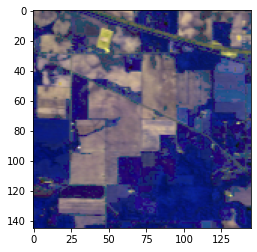

In [ ]:

# Image Data Display
# The imshow function produces a raster display of data associated with an np.ndarray or SpyFile object.
view = imshow(Indian,(29,19,91))

In [ ]:
# RGB data limits for a displayed image can be printed from the __str__ method of the ImageView object
print(view)

ImageView object:
  Display bands       :  (29, 19, 91)
  Interpolation       :  <default>
  RGB data limits     :
    R: [2054.0, 6317.0]
    G: [2560.0, 7307.0]
    B: [1392.0, 4444.0]



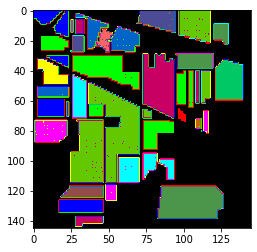

In [ ]:
# Ground Truth map
# To display the ground truth image using imshow, set the classes argument in the imshow function:
view=imshow(classes=Indian_gt)

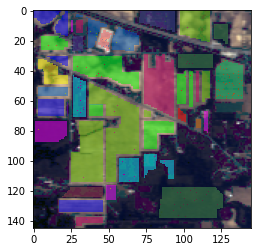

In [ ]:
# For example, to display the image with overlayed class masks, 
# using an alpha transparency of 0.5, 
# type the following commands after calling imshow:
view = imshow(Indian,(30,20,10),classes=Indian_gt)
view.set_display_mode('overlay')
view.class_alpha=0.5

## Unsupervised Classification¶

In [ ]:
# Unsupervised classification algorithms divide image pixels into groups 
#based on spectral similarity of the pixels without using any prior knowledge of the spectral classes.

In [ ]:
# k-means Clustering
# This line of code will display : k-means clustering results¶
(m, c) = kmeans(Indian, 20, 30)

spectral:INFO: k-means iteration 1 - 21025 pixels reassigned.
spectral:INFO: k-means iteration 2 - 10720 pixels reassigned.
spectral:INFO: k-means iteration 3 - 3819 pixels reassigned.
spectral:INFO: k-means iteration 4 - 1880 pixels reassigned.
spectral:INFO: k-means iteration 5 - 1268 pixels reassigned.
spectral:INFO: k-means iteration 6 - 1161 pixels reassigned.
spectral:INFO: k-means iteration 7 - 1341 pixels reassigned.
spectral:INFO: k-means iteration 8 - 1308 pixels reassigned.
spectral:INFO: k-means iteration 9 - 1072 pixels reassigned.
spectral:INFO: k-means iteration 10 - 889 pixels reassigned.
spectral:INFO: k-means iteration 11 - 770 pixels reassigned.
spectral:INFO: k-means iteration 12 - 719 pixels reassigned.
spectral:INFO: k-means iteration 13 - 639 pixels reassigned.
spectral:INFO: k-means iteration 14 - 603 pixels reassigned.
spectral:INFO: k-means iteration 15 - 603 pixels reassigned.
spectral:INFO: k-means iteration 16 - 539 pixels reassigned.
spectral:INFO: k-means

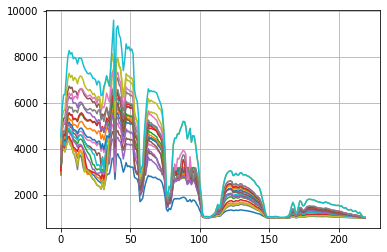

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

for i in range(c.shape[0]):
    plt.plot(c[i])
   

plt.grid()

## Supervised Classification

In [ ]:
#Training Data
# Performing supervised classification requires training a classifier with training data
# that associates samples with particular training classes. To assign class labels to pixels in an image 
# having M rows and N columns, you must provide an MxN integer-valued ground truth array whose elements are indices for
# the corresponding training classes. A value of 0 in the ground truth array indicate an unlabeled pixel
# (the pixel is not associated with a training class)."""

In [ ]:
classes = create_training_classes(Indian , Indian_gt)

In [ ]:
#Gaussian Maximum Likelihood Classification
# In this case, we’ll perform Gaussian Maximum Likelihood Classification (GMLC)
gmlc = GaussianClassifier(classes)

spectral:INFO: Setting min samples to 220
spectral:WARNING: Omitting class   1 : only 46 samples present
spectral:WARNING: Omitting class   7 : only 28 samples present
spectral:WARNING: Omitting class   9 : only 20 samples present
spectral:WARNING: Omitting class  13 : only 205 samples present
spectral:WARNING: Omitting class  16 : only 93 samples present


In [ ]:
# When we created the classifier, it was automatically trained on the training sets we provided. 
# Notice that the classifier ignored five of the training classes. 
# GMLC requires computing the inverse of the covariance matrix for each training class. 
#Since our sample image contains 220 spectral bands, classes with fewer than 220 samples will have singular covariance matrices, 
# for which we can’t compute the inverse.
# Once the classifier is trained, we can use it to classify an image having the same spectral bands as the training set. 
# Let’s classify our training image and display the resulting classification map.

Processing...  0.0%Processing...  9.1%Processing... 18.2%Processing... 27.3%Processing... 36.4%Processing... 45.5%Processing... 54.5%Processing... 63.6%Processing... 72.7%Processing... 81.8%Processing... 90.9%Processing... 100.0%Processing...done   


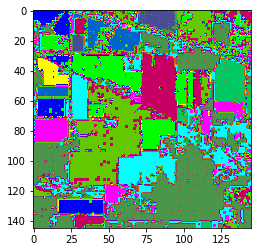

In [ ]:
clmap = gmlc.classify_image(Indian)
v =imshow(classes=clmap)

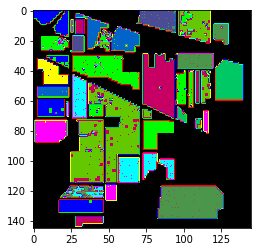

In [ ]:
#The classification map above shows classification results for the entire image. 
#To view results for only the ground truth pixels we must mask out all the pixels not associated with
# a training class.
gtresults = clmap * (Indian_gt != 0)
v = imshow(classes=gtresults)

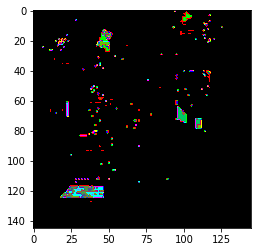

In [ ]:
#If the classification results are good, we expect the classification map above to
#look very similar to the original ground truth map. To view only the errors, 
#we must mask out all elements in gtResults that do not match the ground truth image.
gterrors = gtresults * (gtresults != Indian_gt)
v = imshow(classes=gterrors)

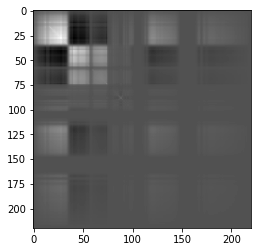

In [ ]:
#Principal Components
pc = principal_components(Indian)
v = imshow(pc.cov)

In [ ]:
#To reduce dimensionality using principal components,
# we can sort the eigenvalues in descending order and then retain enough eigenvalues
pc_0999 = pc.reduce(fraction=0.999)

In [ ]:
 # How many eigenvalues are left?
 len(pc_0999.eigenvalues)

69

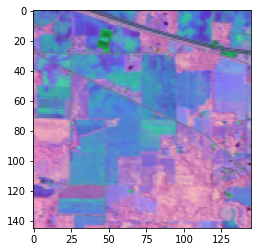

In [ ]:
 img_pc = pc_0999.transform(Indian)
 v = imshow(img_pc[:,:,:3], stretch_all=True)